# <center><u>`LENDING CLUB CASE STUDY`</u></center>

<div class = "alert alert-block alert-info">
    
## Problem Statement

Given data contains the information about past loan applicants and whether they ‘defaulted/charged offtc’ or not. The aim is to identify patterns which indicate if a person is likely to default, which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc.

> **If one is able to identify these risky loan applicants, then such loans can be reduced thereby cutting down the amount of credit loss. Identification of such applicants using EDA is the aim of this case study.**

> **In other words, the company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default. The company can utilise this knowledge for its portfolio and risk assessment.**

</div>

In [112]:
#importing the libraries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# <center>`Data Understanding`</center>

In [113]:
#loading the csv into a dataframe 'Load_df' and viewing the top 5 rows
Loan_df=pd.read_csv("loan.csv")
Loan_df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [114]:
# Viewing the shape of the datframe
print("Total rows present:",Loan_df.shape[0])
print("Total columns present:",Loan_df.shape[1])

Total rows present: 39717
Total columns present: 111


In [115]:
# viewing statistical data of the dataframe and transposing it to view columns better
Loan_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,39717.0,683131.913060,210694.132915,54734.0,516221.0,665665.0,837755.0,1077501.0
member_id,39717.0,850463.559408,265678.307421,70699.0,666780.0,850812.0,1047339.0,1314167.0
loan_amnt,39717.0,11219.443815,7456.670694,500.0,5500.0,10000.0,15000.0,35000.0
funded_amnt,39717.0,10947.713196,7187.238670,500.0,5400.0,9600.0,15000.0,35000.0
funded_amnt_inv,39717.0,10397.448868,7128.450439,0.0,5000.0,8975.0,14400.0,35000.0
...,...,...,...,...,...,...,...,...
tax_liens,39678.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
tot_hi_cred_lim,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
total_bal_ex_mort,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
total_bc_limit,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [116]:
#importing the decription of the columns present in a different csv file and viewing the content
info_df=pd.read_excel("Data_Dictionary.xlsx")
#editing dataframe info_df to view column description later
info_df.set_index("LoanStatNew",inplace=True)

#creating a function to view column details
def col_info(column_name):
    print(info_df.loc[column_name]["Description"])

#Testing the function
col_info('purpose')

A category provided by the borrower for the loan request. 


# <center>`Data Cleaning`</center>


<div class = "alert alert-block alert-info">
    
**It is observed that many columns have all NaN values, Hence removing columns with all NaN values**
</div>    

In [117]:
#Finding out the columns that have all NaN values
Loan_df.columns[Loan_df.isna().all()].tolist()

['mths_since_last_major_derog',
 'annual_inc_joint',
 'dti_joint',
 'verification_status_joint',
 'tot_coll_amt',
 'tot_cur_bal',
 'open_acc_6m',
 'open_il_6m',
 'open_il_12m',
 'open_il_24m',
 'mths_since_rcnt_il',
 'total_bal_il',
 'il_util',
 'open_rv_12m',
 'open_rv_24m',
 'max_bal_bc',
 'all_util',
 'total_rev_hi_lim',
 'inq_fi',
 'total_cu_tl',
 'inq_last_12m',
 'acc_open_past_24mths',
 'avg_cur_bal',
 'bc_open_to_buy',
 'bc_util',
 'mo_sin_old_il_acct',
 'mo_sin_old_rev_tl_op',
 'mo_sin_rcnt_rev_tl_op',
 'mo_sin_rcnt_tl',
 'mort_acc',
 'mths_since_recent_bc',
 'mths_since_recent_bc_dlq',
 'mths_since_recent_inq',
 'mths_since_recent_revol_delinq',
 'num_accts_ever_120_pd',
 'num_actv_bc_tl',
 'num_actv_rev_tl',
 'num_bc_sats',
 'num_bc_tl',
 'num_il_tl',
 'num_op_rev_tl',
 'num_rev_accts',
 'num_rev_tl_bal_gt_0',
 'num_sats',
 'num_tl_120dpd_2m',
 'num_tl_30dpd',
 'num_tl_90g_dpd_24m',
 'num_tl_op_past_12m',
 'pct_tl_nvr_dlq',
 'percent_bc_gt_75',
 'tot_hi_cred_lim',
 'total_bal

In [118]:
#dropping the columns that are having all NaN values
Loan_df.dropna(axis=1,how="all",inplace=True)

In [119]:
#checking the shape of the data after dropping the columns with all NaNs
print("Total rows present:",Loan_df.shape[0])
print("Total columns present:",Loan_df.shape[1])

Total rows present: 39717
Total columns present: 57


In [120]:
#finding how many columns still consists of NaN values
Loan_df.columns[Loan_df.isna().any()]

Index(['emp_title', 'emp_length', 'desc', 'title', 'mths_since_last_delinq',
       'mths_since_last_record', 'revol_util', 'last_pymnt_d', 'next_pymnt_d',
       'last_credit_pull_d', 'collections_12_mths_ex_med',
       'chargeoff_within_12_mths', 'pub_rec_bankruptcies', 'tax_liens'],
      dtype='object')

<div class = "alert alert-block alert-info">
    
**Removing Columns which has more than 50% Null values**
</div>    

In [121]:
#dropping the columns that have more than 50% of NaN values
Loan_df.dropna(axis=1,thresh=Loan_df.shape[0]/2,inplace=True)

In [122]:
# Viewing the shape of the datframe
print("Total rows present:",Loan_df.shape[0])
print("Total columns present:",Loan_df.shape[1])

Total rows present: 39717
Total columns present: 54


In [123]:
Loan_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,39717.0,683131.913060,210694.132915,54734.00,516221.00,665665.000000,8.377550e+05,1.077501e+06
member_id,39717.0,850463.559408,265678.307421,70699.00,666780.00,850812.000000,1.047339e+06,1.314167e+06
loan_amnt,39717.0,11219.443815,7456.670694,500.00,5500.00,10000.000000,1.500000e+04,3.500000e+04
funded_amnt,39717.0,10947.713196,7187.238670,500.00,5400.00,9600.000000,1.500000e+04,3.500000e+04
funded_amnt_inv,39717.0,10397.448868,7128.450439,0.00,5000.00,8975.000000,1.440000e+04,3.500000e+04
installment,39717.0,324.561922,208.874874,15.69,167.02,280.220000,4.307800e+02,1.305190e+03
annual_inc,39717.0,68968.926377,63793.765790,4000.00,40404.00,59000.000000,8.230000e+04,6.000000e+06
dti,39717.0,13.315130,6.678594,0.00,8.17,13.400000,1.860000e+01,2.999000e+01
delinq_2yrs,39717.0,0.146512,0.491812,0.00,0.00,0.000000,0.000000e+00,1.100000e+01
inq_last_6mths,39717.0,0.869200,1.070219,0.00,0.00,1.000000,1.000000e+00,8.000000e+00


<div class = "alert alert-block alert-info">
    
**From the data set it is observed that some columns have majority values as 0, these columns do not contribute to analysis, Hence removing the columns that are mostly having 0's as entries**
</div>    

In [124]:
#checking the columns that have zeros till 80th percentile 
check = (Loan_df.quantile(0.80) > 0) 
check = check[check == False]

In [125]:
#dropping the columns that have mean and median as 0 (zero)
Loan_df.drop(labels=check.index.tolist(),inplace=True,axis=1)

In [126]:
# Viewing the shape of the datframe
print("Total rows present:",Loan_df.shape[0])
print("Total columns present:",Loan_df.shape[1])

Total rows present: 39717
Total columns present: 41


In [127]:
Loan_df.columns.tolist()

['id',
 'member_id',
 'loan_amnt',
 'funded_amnt',
 'funded_amnt_inv',
 'term',
 'int_rate',
 'installment',
 'grade',
 'sub_grade',
 'emp_title',
 'emp_length',
 'home_ownership',
 'annual_inc',
 'verification_status',
 'issue_d',
 'loan_status',
 'pymnt_plan',
 'url',
 'desc',
 'purpose',
 'title',
 'zip_code',
 'addr_state',
 'dti',
 'earliest_cr_line',
 'inq_last_6mths',
 'open_acc',
 'revol_bal',
 'revol_util',
 'total_acc',
 'initial_list_status',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'last_pymnt_d',
 'last_pymnt_amnt',
 'last_credit_pull_d',
 'policy_code',
 'application_type']

**Some columns that can be dropped since they do not contribute to the analysis or redundant**

	• id (unique id to every loan)
	• member_id (unique id to every member)
	• funded_amnt (similar value of loan amount)
	• funded_amnt_inv (related to investors value, not needed for analysis)
	• url (url of the LC)
	• emp_title (emp_title is not needed, we have annual income and emp_length to segment the data)
	• title (Title of the loan given by borrower, the properly segmented data found in purpose column)
	• zip_code (zip_code is not needed as we already have state wise data)


**Many post loan variables are dropped which are not useful for analysis because these variables arise after the loans are disbursed**

	• pymnt_plan
	• initial_list_status
	• policy_code
	• application_type
	• total_pymnt_inv
	• total_rec_prncp
	• total_rec_int
	• last_pymnt_amnt
	• last_credit_pull_d
	• earliest_cr_line
	• inq_last_6mths
	• open_acc
	• revol_bal
	• revol_util
	• total_acc
	• total_pymnt
	• last_pymnt_d


In [128]:
#creating a list that has redundant columns that can be removed
redundant_column_list = ['id', 'member_id','funded_amnt', 'funded_amnt_inv','emp_title','pymnt_plan', 'url','title','zip_code','policy_code', 'application_type','initial_list_status','total_pymnt_inv',
        'total_rec_prncp', 'total_rec_int','last_pymnt_amnt','last_credit_pull_d',  'earliest_cr_line', 'inq_last_6mths', 'open_acc', 'revol_bal','revol_util', 'total_acc', 'total_pymnt', 'last_pymnt_d','desc','sub_grade','issue_d']

In [129]:
#dropping the redundant_column_list from the data
Loan_df.drop(labels=redundant_column_list,axis=1,inplace=True)

In [130]:
#looking at the shape of the data after removing the redundant columns
print("Total rows present:",Loan_df.shape[0])
print("Total columns present:",Loan_df.shape[1])

Total rows present: 39717
Total columns present: 13


<div class = "alert alert-block alert-info">
    
### Check Empty rows in data set
</div>    

In [131]:
#check how many rows have all missing values
print(Loan_df.isnull().all(axis=1).sum())

0


In [132]:
#check how many rows have duplicate values
Loan_df.duplicated().sum()

0

**For our analysis the loan status of "Fully Paid" and "Charged Off" are needed, Hence removing the "Current" entries from the column**

In [133]:
#removing the "Current" entries in loan data
Loan_df = Loan_df[~(Loan_df.loan_status == "Current")]

In [134]:
#looking at the shape of the data after removing the "Current" in loan staus from data
print("Total rows present:",Loan_df.shape[0])
print("Total columns present:",Loan_df.shape[1])

Total rows present: 38577
Total columns present: 13


# <center>`Data Handling`</center>

<div class = "alert alert-block alert-info">

### Check columns data type and cast to desired data type
</div>    

In [135]:
Loan_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   loan_amnt            38577 non-null  int64  
 1   term                 38577 non-null  object 
 2   int_rate             38577 non-null  object 
 3   installment          38577 non-null  float64
 4   grade                38577 non-null  object 
 5   emp_length           37544 non-null  object 
 6   home_ownership       38577 non-null  object 
 7   annual_inc           38577 non-null  float64
 8   verification_status  38577 non-null  object 
 9   loan_status          38577 non-null  object 
 10  purpose              38577 non-null  object 
 11  addr_state           38577 non-null  object 
 12  dti                  38577 non-null  float64
dtypes: float64(3), int64(1), object(9)
memory usage: 4.1+ MB


In [136]:
#Check total number of null values in emp_length column
Loan_df.emp_length.isnull().sum()

1033

In [137]:
#Replace all null values with zero in emp_length column
Loan_df["emp_length"].fillna(0,inplace=True)

<div class = "alert alert-block alert-info">
    
#### 1. Converting term column from object to integer

</div>    

In [138]:
Loan_df['term'] = Loan_df['term'].map(lambda x: x.rstrip(' months'))
Loan_df['term']=Loan_df['term'].map(lambda x: int(x))

<div class = "alert alert-block alert-info">

#### 2.Modifying the int_rate column
</div>    

In [139]:
#converting int_rate column from string to numeric after removing % 
Loan_df['int_rate'] = pd.to_numeric(Loan_df['int_rate'].str.strip('%'))

<div class = "alert alert-block alert-info">
    
#### 3.Extract only number from emp_length column
</div>    

In [140]:
#Extracting only number of years in emp_length column eliminating "year"
Loan_df["emp_length"] = Loan_df.emp_length.apply(lambda x: "0" if x == "< 1 year"  else x)
Loan_df["emp_length"]=Loan_df["emp_length"].astype('str').str.extractall('(\d+)').unstack().astype(int)

# <center>`Univariate Analysis`</center>

#### Univariate Analysis is analysing single variable to see its distribution.

<div class = "alert alert-block alert-info">

#### 1. Analysis on Loan amount
</div>    

In [141]:
#Analysing loan amount column, this is Quantitative variable so checking summary metrics
Loan_df['loan_amnt'].describe()

count    38577.000000
mean     11047.025430
std       7348.441646
min        500.000000
25%       5300.000000
50%       9600.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

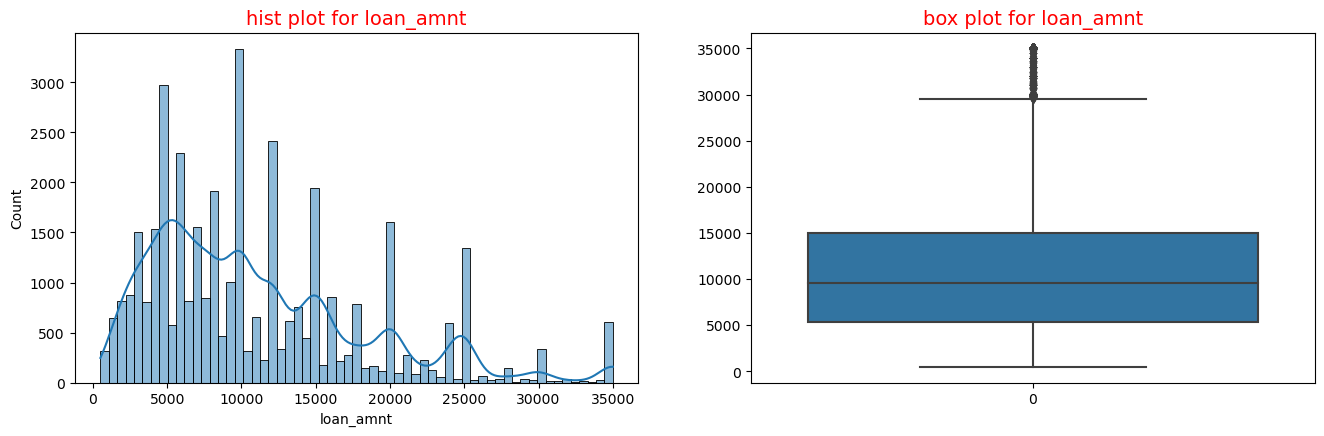

In [142]:
#drawing histplot and box-plot for loan_amnt simultaneously to undertand its distribution and outlier detection
plt.figure(figsize=(16,10))
# subplot 1
plt.subplot(2, 2, 1)
plot_Loanamt = sns.histplot(Loan_df.loan_amnt,kde=True)
plt.title("hist plot for loan_amnt",fontsize=14,color="r")
# subplot 2
plt.subplot(2, 2, 2)
plot_Loanamt = sns.boxplot(Loan_df.loan_amnt)
plt.title("box plot for loan_amnt",fontsize=14,color="r")
plt.show()

#### Observations:
<div class = "alert alert-block alert-warning">
    
• Most of the loan amounts are distributed between 5000 and 15000
    
• The median of the loan amount is close to 10000
    
• At every multiple of 5000, there is a peak in loan amount, which says that loans are often sanctioned in multiples of 5000
    
</div>    

<div class = "alert alert-block alert-info">

#### 2. Analysis on interest rate
</div>    

In [143]:
#Analysing loan interest rate column, this is Quantitative variable so checking summary metrics
Loan_df['int_rate'].describe()

count    38577.000000
mean        11.932219
std          3.691327
min          5.420000
25%          8.940000
50%         11.710000
75%         14.380000
max         24.400000
Name: int_rate, dtype: float64

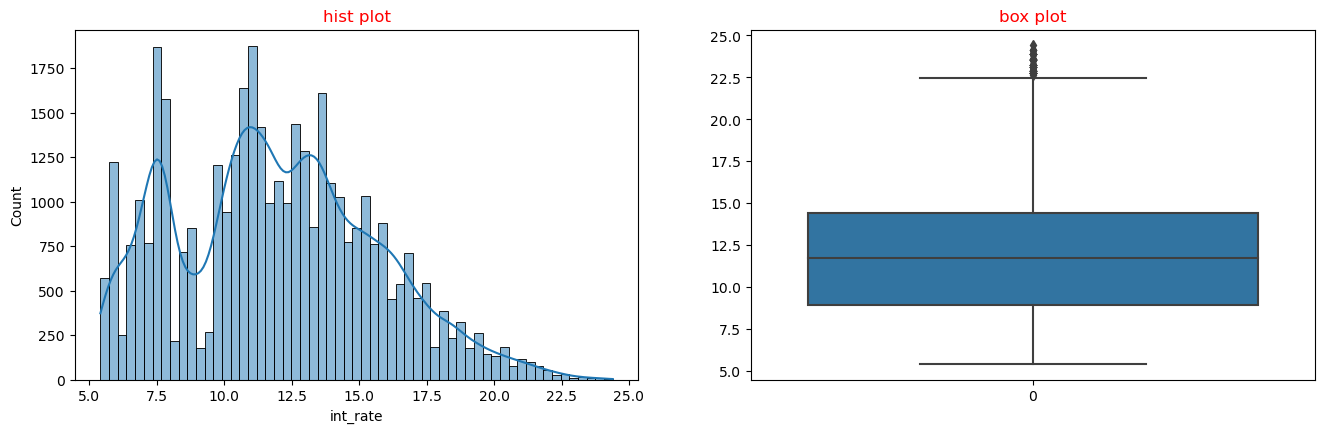

In [144]:
#drawing plots for interest rate
plt.figure(figsize=(16,10))
# subplot 1 - Histogram
plt.subplot(2, 2, 1)
plot_intRate = sns.histplot(Loan_df.int_rate,kde=True)
plt.title("hist plot",color="red")
# subplot 2 - Boxplot
plt.subplot(2, 2, 2)
plot_intRate = sns.boxplot(Loan_df.int_rate)
plt.title("box plot",color="r")
plt.show()

#### Observations:
<div class = "alert alert-block alert-warning">
    
• The mean interest rate of the loans is 11.9% and the median is 11.7%
    
• There are very high interest rates up to 24% but the number of loans at such interest rates are quite low
    
</div>    

<div class = "alert alert-block alert-info">

#### 3. Analysis on term of loan
</div>    

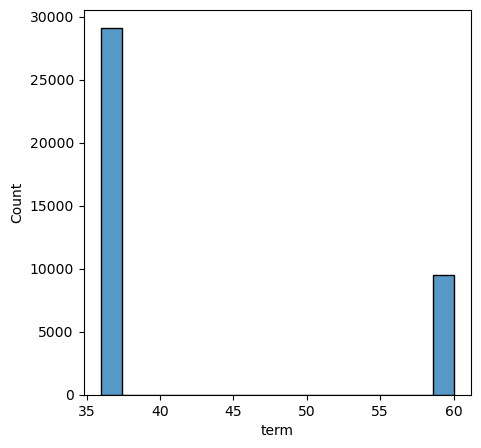

In [145]:
#plotting a histogram for the variable term to see how the data is distributed
plt.figure(figsize=(5,5))
sns.histplot(Loan_df['term'])
plt.show()

#### Observations:
<div class = "alert alert-block alert-warning">
    
• The majority of the term is 36 months
    
• This variable does not convey any insights
    
<div>    

<div class = "alert alert-block alert-info">
    
#### 4. Analysis on installment column
</div>    

In [146]:
#understanding the statistical distribution of the data by using describe()
Loan_df['installment'].describe()

count    38577.000000
mean       322.466318
std        208.639215
min         15.690000
25%        165.740000
50%        277.860000
75%        425.550000
max       1305.190000
Name: installment, dtype: float64

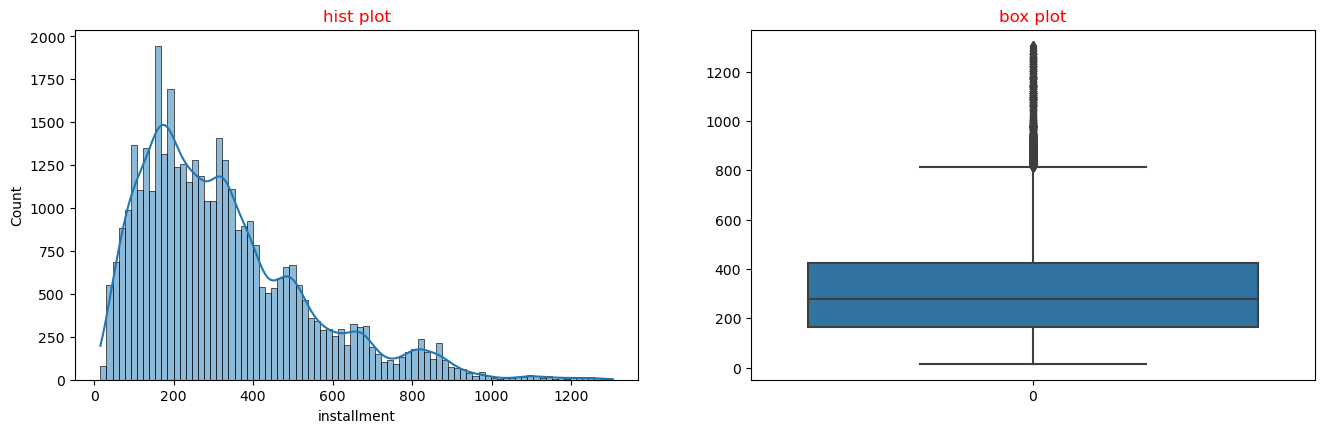

In [147]:
#drawing plots for instalment
plt.figure(figsize=(16,10))
# subplot 1 - Histogram
plt.subplot(2, 2, 1)
ax = sns.histplot(Loan_df.installment,kde=True)
plt.title("hist plot",color="r")
# subplot 2 - Boxplot
plt.subplot(2, 2, 2)
ax = sns.boxplot(Loan_df.installment)
plt.title("box plot",color="r")
plt.show()

#### Observations:
<div class = "alert alert-block alert-warning">
• Majority of the installment lie between 200-400, median installment is 277 and mean is 322
</div>    

<div class = "alert alert-block alert-info">
    
#### 5. Analysis on Employee length
</div>    

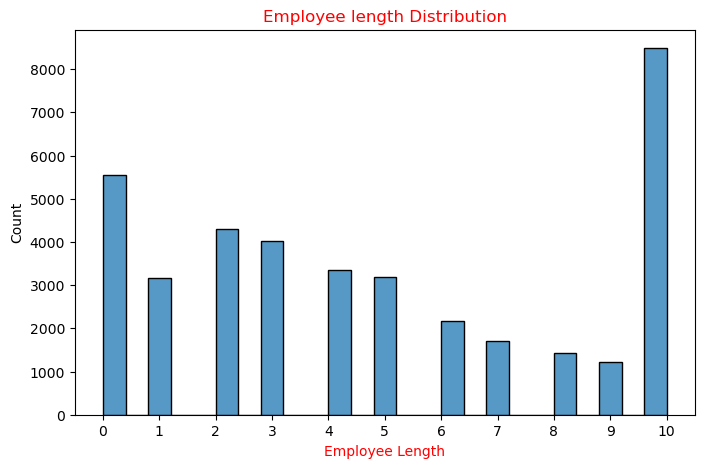

In [148]:
#drawing plot for Employee length
plt.figure(figsize=(8,5))
ax = sns.histplot(Loan_df['emp_length'])
plt.title("Employee length Distribution",fontdict={"color":"red"})
plt.xlabel("Employee Length",fontdict={"color":"red"})
plt.xticks(np.arange(0,11))
plt.show()

#### Observations:
<div class = "alert alert-block alert-warning">
* Employee length is the highest for 10 or more years.
</div>


<div class = "alert alert-block alert-info">
    
#### 6. Analysis on Loan Paying Term - Ordered Categorical Variables 
</div> 

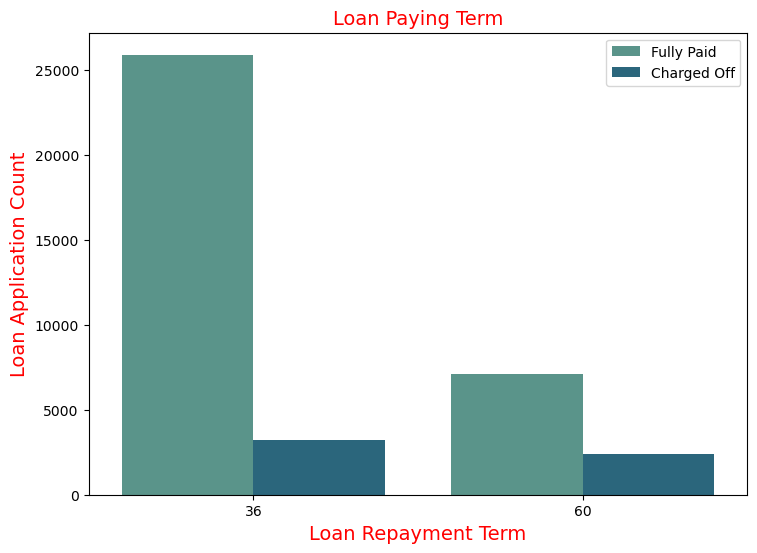

In [149]:
plt.figure(figsize=(8.5,6),facecolor='w')
ax = sns.countplot(x="term",data=Loan_df,hue='loan_status',palette='crest')
ax.set_title('Loan Paying Term',fontsize=14,color='r')
ax.set_xlabel('Loan Repayment Term',fontsize=14,color = 'r')
ax.set_ylabel('Loan Application Count',fontsize=14,color = 'r')      
ax.legend(bbox_to_anchor=(1, 1))
plt.show()

#### Observations:
<div class = "alert alert-block alert-warning">
•  Plot shows that those who had taken loan to repay in 60 months had more % of number of applicants getting charged off as compared to applicants who had taken loan for 36 months.
</div>    

<div class = "alert alert-block alert-info">
    
#### 7. Analysis on Home Ownership
</div>    

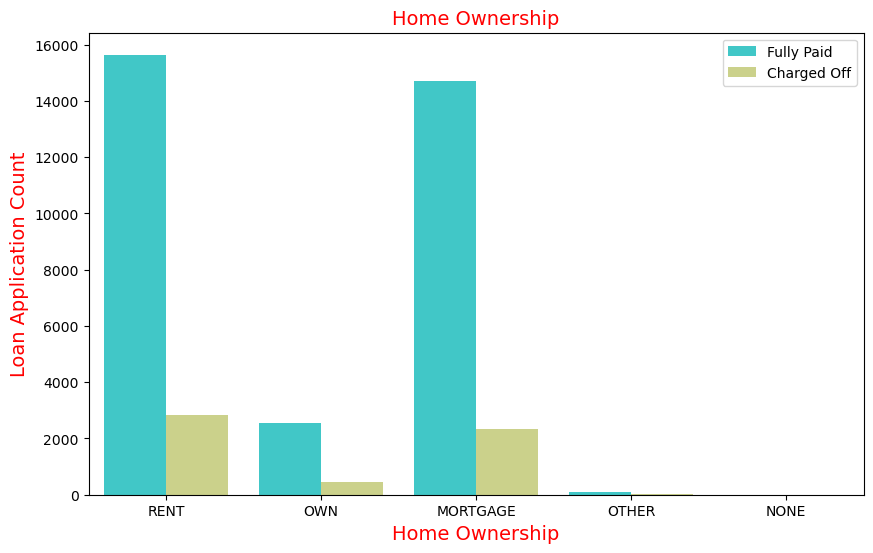

In [150]:
plt.figure(figsize=(10,6),facecolor='w')
ax = sns.countplot(x="home_ownership",data=Loan_df,hue='loan_status',palette='rainbow')
ax.legend(bbox_to_anchor=(1, 1))
ax.set_title('Home Ownership',fontsize=14,color='r')
ax.set_xlabel('Home Ownership',fontsize=14,color = 'r')
ax.set_ylabel('Loan Application Count',fontsize=14,color = 'r')      
plt.show()

#### Observations:
<div class = "alert alert-block alert-warning">
• From the Plot it is seen that most of them living in rented home or mortgaged their home have high Applicant numbers from these categories so charged off is high too.
</div>

<div class = "alert alert-block alert-info">
    
#### 8. Analysis on Purpose of loan
</div>    

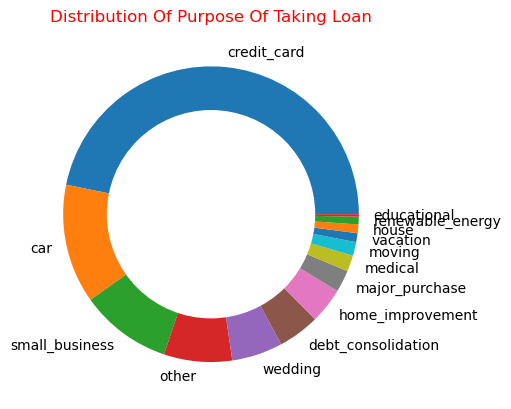

In [151]:
#creating a donut chart for the purpose of the loan
plt.pie(Loan_df["purpose"].value_counts(),labels=Loan_df["purpose"].unique().tolist())
plt.title("Distribution Of Purpose Of Taking Loan",fontdict={"color":"red"})
circle = plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(circle)
plt.show()

#### Before starting Bivariate Analysis, checking the correlation between some columns.

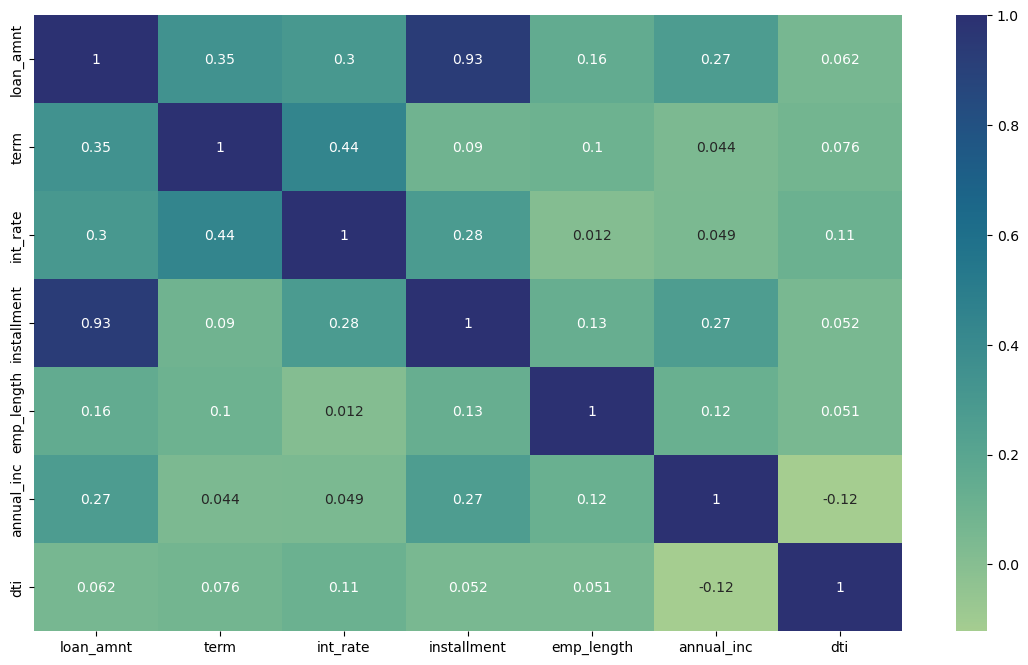

In [152]:
plt.figure(figsize= (14,8))
s = Loan_df.corr()
sns.heatmap(s,cmap='crest',annot=True)
plt.show()

 #### Observations:
<div class = "alert alert-block alert-warning">
    
* From the plot is seen that loan amount and installment are highly correlated.
    
* Term and interest rate are also correlated, this is because as the interest rate is high, borrowers tend to take more time period.
</div>

# <center>`Bivariate Analysis`</center>

#### Bivariate Analysis is analysing two variables to see its distribution.

<div class = "alert alert-block alert-info">
    
#### 1. Analysis between Loan Amount and Purpose of loan
</div>    

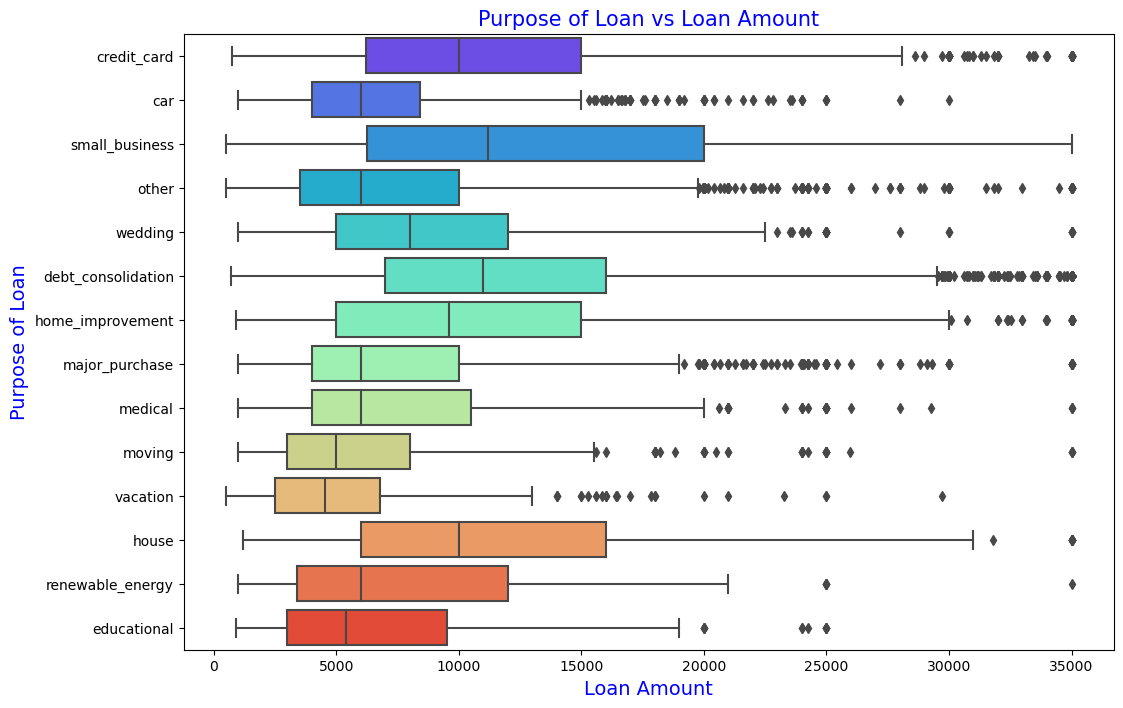

In [153]:
plt.figure(figsize=(12,8),facecolor='w')
ax = sns.boxplot(y='purpose', x='loan_amnt', data =Loan_df,palette='rainbow')
ax.set_title('Purpose of Loan vs Loan Amount',fontsize=15,color='b')
ax.set_ylabel('Purpose of Loan',fontsize=14,color = 'b')
ax.set_xlabel('Loan Amount',fontsize=14,color = 'b')
plt.show()

#### Observations:
<div class = "alert alert-block alert-warning">

* Median,95th percentile,75th percentile of loan amount is highest for loan taken for small business purpose among all purposes.

* Debt consolidation is second and Credit card comes 3rd.
</div>    

<div class = "alert alert-block alert-info">
    
#### 2. Analysis between Term of loan vs Interest Rate
</div>    

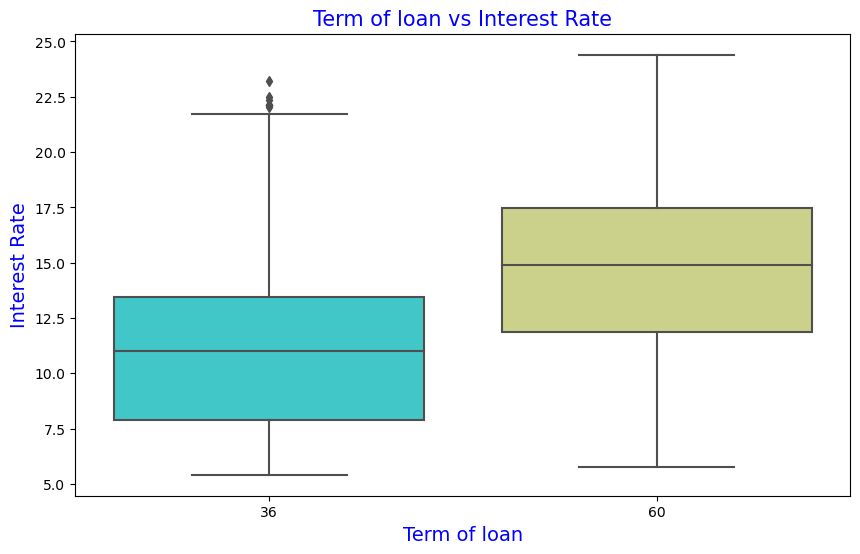

In [154]:
plt.figure(figsize=(10,6),facecolor='w')
ax = sns.boxplot(y='int_rate', x='term', data =Loan_df,palette='rainbow')
ax.set_title('Term of loan vs Interest Rate',fontsize=15,color='b')
ax.set_ylabel('Interest Rate',fontsize=14,color = 'b')
ax.set_xlabel('Term of loan',fontsize=14,color = 'b')
plt.show()

##### Observations:
<div class = "alert alert-block alert-warning">
    
* It is clear that avearge intrest rate is higher for 60 months loan term.
* Most of the loans issued for longer term had higher intrest rates for repayement.
</div>    

<div class = "alert alert-block alert-info">
    
#### 3. Analysis dti and interest rate
</div>    

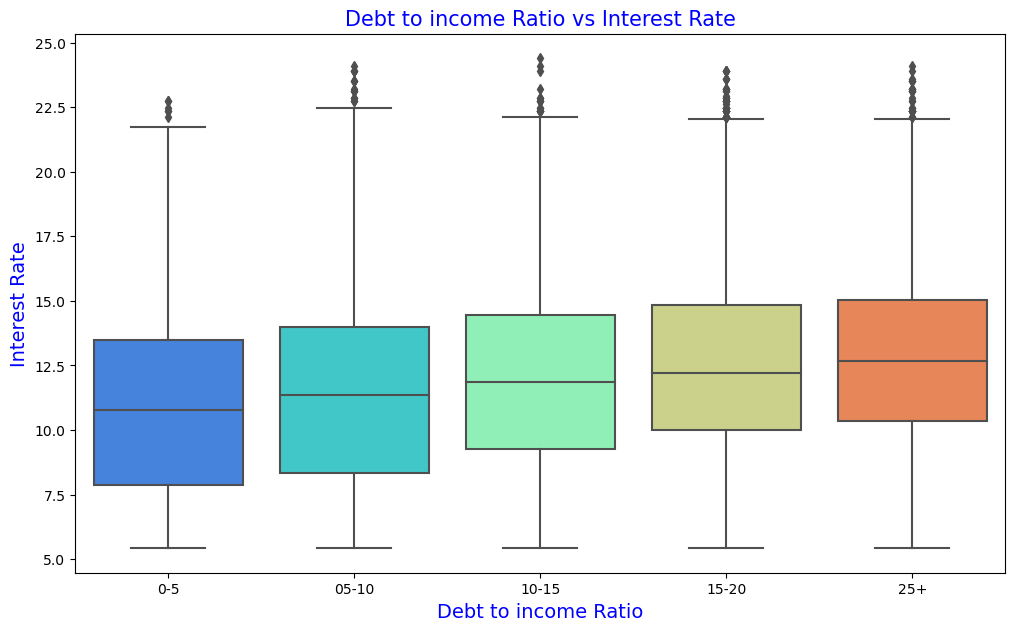

In [155]:
# categorise dti into buckets for analysis.
Loan_df['dti_cats'] = pd.cut(Loan_df['dti'], [0, 5, 10, 15, 20, 25], labels=['0-5', '05-10', '10-15', '15-20', '25+'])

plt.figure(figsize=(12,7),facecolor='w')
ax = sns.boxplot(y='int_rate', x='dti_cats', data =Loan_df,palette='rainbow')
ax.set_title('Debt to income Ratio vs Interest Rate',fontsize=15,color='b')
ax.set_ylabel('Interest Rate',fontsize=14,color = 'b')
ax.set_xlabel('Debt to income Ratio',fontsize=14,color = 'b')
plt.show()

#### Observations:
* If the DTI is low enough borrower may get a lower interest rate.
* Plot shows no significant variation but there is slight increase in interest rate with increase in DTI.
</div>

<div class = "alert alert-block alert-info">
    
#### 4. Defaulters vs Term Period
</div>    

In [156]:
#creating a new dataframe which contains all the charged off cases
charged_off_df=Loan_df[Loan_df.loan_status=="Charged Off"]

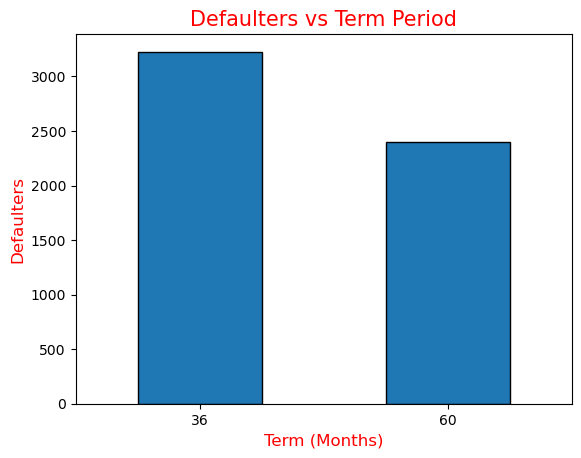

In [157]:
#plotting bar between Defaulters and Term Period
charged_off_df.pivot_table(index="term",values="loan_status",aggfunc="count").plot.bar(legend=False,edgecolor="black")
plt.title("Defaulters vs Term Period",fontdict={"fontsize":15,"color":"red"})
plt.xlabel("Term (Months)",fontdict={"fontsize":12,"color":"red"})
plt.ylabel("Defaulters",fontdict={"fontsize":12,"color":"red"})
plt.xticks(rotation=360)
plt.show()

#### Observation: 
<div class = "alert alert-block alert-warning">
* People with shorter term period have defaulted more.
</div>    

<div class = "alert alert-block alert-info">
    
#### 5. Defaulters vs Interest Rate
</div>    

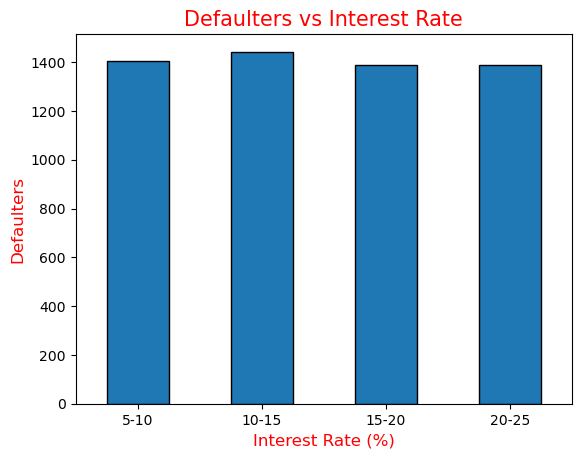

In [158]:
#Dividing the interest rate in multiple buckets for the analysis
charged_off_df["int_rate_buckets"]=pd.qcut(charged_off_df["int_rate"],[0,0.25,0.5,0.75,1],["5-10","10-15","15-20","20-25"])

#plotting bar between Defaulters and Interest Rate
charged_off_df.pivot_table(index="int_rate_buckets",values="loan_status",aggfunc="count").plot.bar(legend=False,edgecolor="black")
plt.title("Defaulters vs Interest Rate",fontdict={"fontsize":15,"color":"red"})
plt.xlabel("Interest Rate (%)",fontdict={"fontsize":12,"color":"red"})
plt.xticks(rotation=360)
plt.ylabel("Defaulters",fontdict={"fontsize":12,"color":"red"})
plt.show()

#### Observation:
<div class = "alert alert-block alert-warning">
    
* Whatsoever was the interest rate, people have almost defaulted equally.
</div>    

<div class = "alert alert-block alert-info">
    
#### 6. Defaulters vs Loan Amount
</div>    

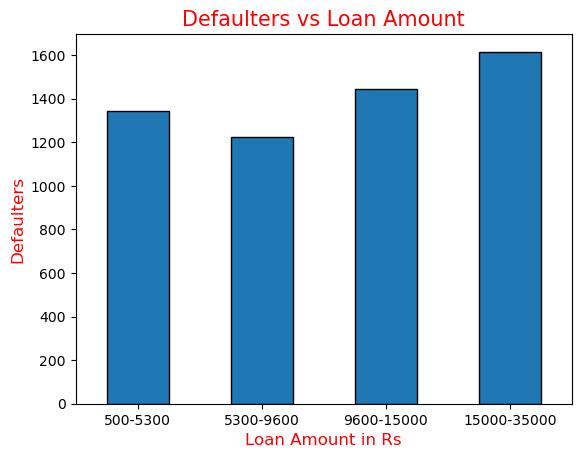

In [159]:
#Dividing the loan amount in multiple buckets for the analysis
charged_off_df["loan_amnt_bucket"]=pd.qcut(Loan_df["loan_amnt"],[0,0.25,0.5,0.75,1],["500-5300","5300-9600","9600-15000","15000-35000"])

#plotting bar between Defaulters and Loan Amount
charged_off_df.pivot_table(index="loan_amnt_bucket",values="loan_status",aggfunc="count").plot.bar(legend=False,edgecolor="black")
plt.title("Defaulters vs Loan Amount",fontdict={"fontsize":15,"color":"red"})
plt.xlabel("Loan Amount in Rs",fontdict={"fontsize":12,"color":"red"})
plt.ylabel("Defaulters",fontdict={"fontsize":12,"color":"red"})
plt.xticks(rotation=360)
plt.show()

#### Observation: 
<div class = "alert alert-block alert-warning">

* People with higher income have defaulted more.
</div>    

<div class = "alert alert-block alert-info">
    
#### 7. Defaulters vs Home Ownership
</div>

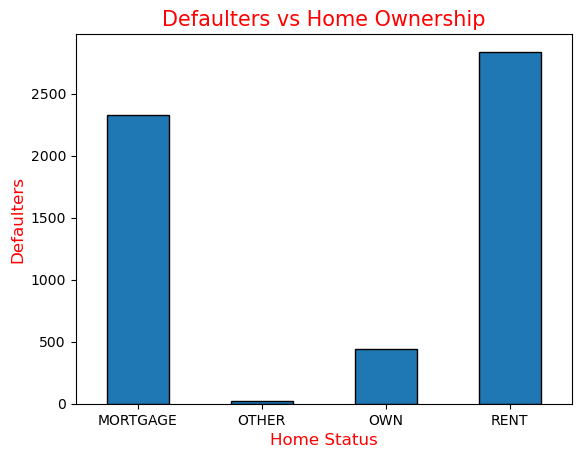

In [160]:
#plotting bar between Defaulters and Home Ownership
charged_off_df.pivot_table(values="loan_status",index="home_ownership",aggfunc="count").plot.bar(legend=False,edgecolor="black")
plt.title("Defaulters vs Home Ownership",fontdict={"fontsize":15,"color":"red"})
plt.xlabel("Home Status",fontdict={"fontsize":12,"color":"red"})
plt.ylabel("Defaulters",fontdict={"fontsize":12,"color":"red"})
plt.xticks(rotation=360)
plt.show()

#### Observation: 
<div class = "alert alert-block alert-warning">

* People living on rent have defaulted more.
* People who own the house have relatively defaulted less. 
</div>    

<div class = "alert alert-block alert-info">
    
#### 8. Defaulters vs Annual Income 
</div>    

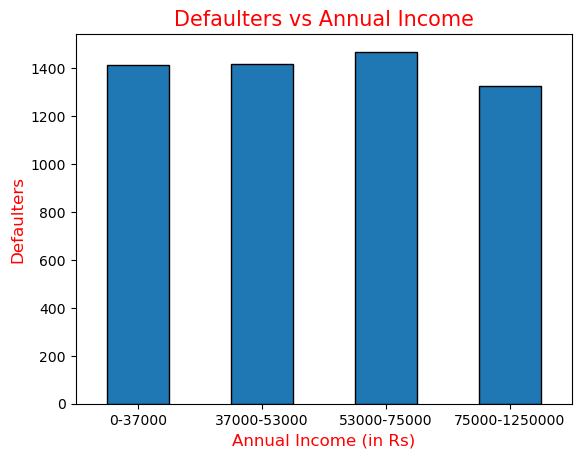

In [161]:
#Dividing the loan amount in multiple buckets for the analysis
charged_off_df["annual_inc_buckets"]=pd.qcut(charged_off_df["annual_inc"],[0,0.25,0.5,0.75,1],["0-37000","37000-53000","53000-75000","75000-1250000"])

#plotting bar between Defaulters and Annual Income
charged_off_df.pivot_table(index="annual_inc_buckets",values="loan_status",aggfunc="count").plot(kind="bar",legend=False,edgecolor="black")
plt.title("Defaulters vs Annual Income",fontdict={"fontsize":15,"color":"red"})
plt.xlabel("Annual Income (in Rs)",fontdict={"fontsize":12,"color":"red"})
plt.ylabel("Defaulters",fontdict={"fontsize":12,"color":"red"})
plt.xticks(rotation=360)
plt.show()

#### Observation:
<div class = "alert alert-block alert-warning">

* Irrespective of the annual income defaulters count is almost equal.
</div>    

<div class = "alert alert-block alert-info">
    
#### 9. Defaulters vs Purpose Of Loan
</div>    

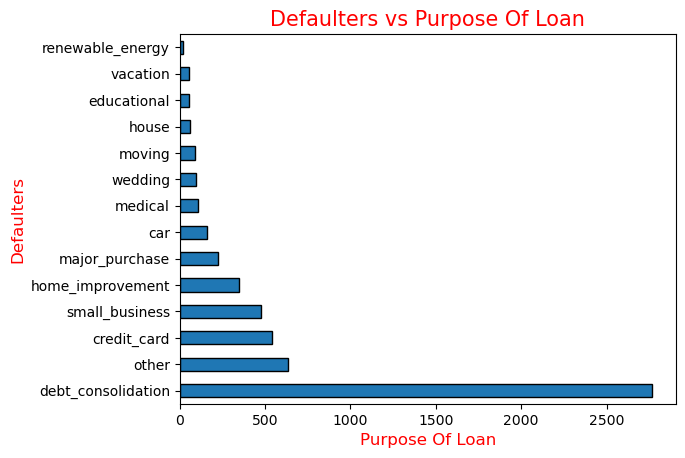

In [162]:
#plotting bar between Defaulters and Purpose Of Loan
charged_off_df["purpose"].value_counts().plot.barh(edgecolor="black")
plt.title("Defaulters vs Purpose Of Loan",fontdict={"fontsize":15,"color":"red"})
plt.xlabel("Purpose Of Loan",fontdict={"fontsize":12,"color":"red"})
plt.ylabel("Defaulters",fontdict={"fontsize":12,"color":"red"})
plt.show()


#### Observation: 
<div class = "alert alert-block alert-warning">

* People who took loan for Debt Consolidation have defaulted more.
</div>    

<div class = "alert alert-block alert-info">
    
#### 10. State vs Defaulters
</div>    

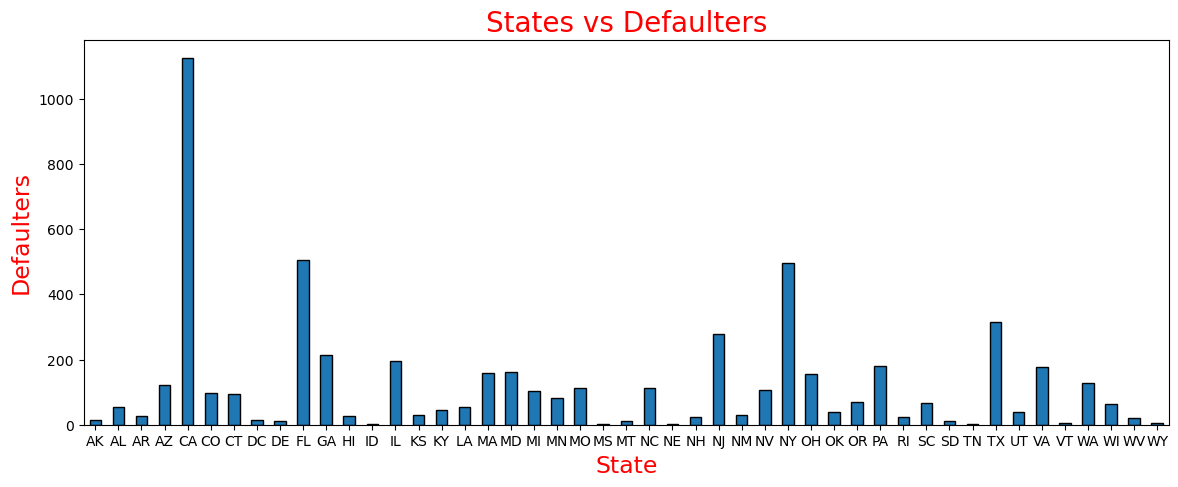

In [163]:
#plotting bar for defaulters in various states
charged_off_df.pivot_table(index="addr_state",values="loan_status",aggfunc="count").plot.bar(legend=False,figsize=(14,5),edgecolor="black")
plt.title("States vs Defaulters",fontdict={"fontsize":20,"color":"red"})
plt.xlabel("State",fontdict={"fontsize":17,"color":"red"})
plt.ylabel("Defaulters",fontdict={"fontsize":17,"color":"red"})
plt.xticks(rotation=360)
plt.show()

#### Observation: 
<div class = "alert alert-block alert-warning">

* People from CA have defaulted more significantly more as compared to the other states.
</div>

# <center>`Multivariate Analysis`</center>

#### Relationship between Loan Purpose,Annual Income and Interest Rate

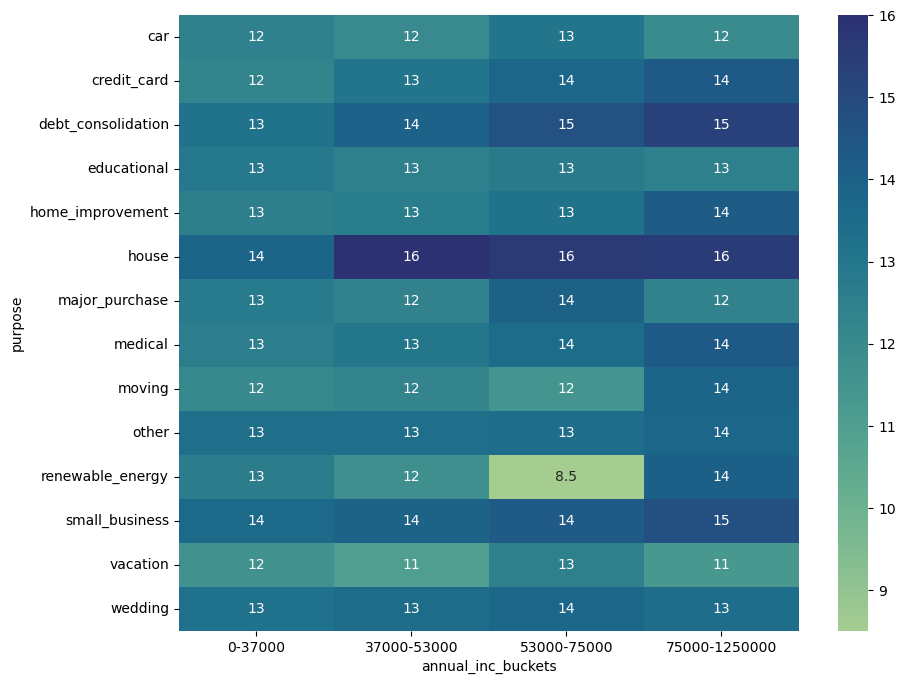

In [164]:
heat_purp_int=charged_off_df.pivot_table(columns="annual_inc_buckets",index="purpose",values="int_rate",aggfunc="mean")
plt.figure(figsize=[10,8])
sns.heatmap(heat_purp_int,cmap="crest",annot=True)
plt.show()

#### Observations: 
<div class = "alert alert-block alert-warning">

* People from Renewable Energy purpose still defualted even if given a loan for the least average interest rate.
* Although the people from House purpose charged off less, those who did had taken loan for higher interest rate irrespective of their income.
</div>    

## `Observations and Recommendations on Loan data set:`

<div class = "alert alert-block alert-success">

* People living on rent have defaulted more. 
* Small business loans are in higher demand and less for Vacation.
* People who took loan for Debt Consolidation have defaulted more.

<b> • There is a 5x higher default rate for debt consolidation loans compared to small business loans. </b>
    
<b> • Lending to small businesses is advisable due to low default rates and increasing borrower numbers. </b>
    
</div>